The OpenSky API (https://opensky-network.org/apidoc/rest.html) allows you to retrieve updated flight or aircraft status information in real time. We are going to use the basic version of this API and, therefore, we are not going to have the option to select the time interval of interest.

We are going to obtain the status of the air (planes and aircraft) during a sequence of 10 queries. The request to the API is requested to be made through the requests library.

This API allows you to add a limitation of the space to be considered in the request. The delimitation of the airspace will correspond to the following values ​​of latitude and longitude:
- lat_max= 72.822950; lon_min= -17.000158; lat_min= 35.550423; lon_max= 44.022436

We are going to obtain the total number of aircraft grouped by country of origin of the aircraft. For this, it will be necessary to review the API documentation and explore the form of the response to determine what is the field of interest of the scraped data for the realization. In addition to the number of aircraft by country of origin, in each iteration the temporary value of the query it also will be stored.

With the result of the 10 iterations, we are going to do the next:
- A dataframe (df_vuelos) is created that collects the total number of aircraft for each country of origin (rows) for each instant of time (columns).
- A 'mean_flights' column is added that represents the mean value of flights for each country during the time interval considered with the 10 iterations.
- Represent with a bar chart the number of average flights of the 10 countries with the highest average number of flights in the considered time interval. The X axis will correspond to the country and the Y axis to the value of average flights. Show values ​​in ascending order.
- From the mean values ​​obtained in the previous section, represent with a bar chart the percentage represented by each of these 10 countries with respect to the total number of flights in the considered time interval. The X axis will correspond to the country and the Y axis to the percentage value of flights. Show values ​​in ascending order.

## Create dataframe of 10 iterations

In [ ]:
# load library
import requests
import numpy as np
import pandas as pd
import time

In [ ]:
# Europe
lat_max= 72.822950
lon_min= -17.000158
lat_min= 35.550423
lon_max= 44.022436

In [22]:
df_vuelos=pd.DataFrame()
for i in range(0,10):
    r=requests.get('https://opensky-network.org/api/states/all?lamin='+str(lat_min)+'&lomin='+str(lon_min)+'&lamax='+str(lat_max)+'&lomax='+str(lon_max))
    data=r.json()
    countries= np.asarray([elements[2] for elements in data['states']])
    values_c, counts_c = np.unique(countries, return_counts=True)
    df_country=pd.DataFrame()
    df_country['Country']=values_c
    df_country['time_'+str(data['time'])]=counts_c
    print('time: '+ str(data['time']), df_country.shape)
    if i==0:
        df_vuelos=df_country
    else:
        if df_vuelos.columns[-1]!='time_'+str(data['time']):
            df_vuelos=df_vuelos.merge(df_country, how='outer', on='Country')
    time.sleep(5)

print(df_vuelos.shape)

JSONDecodeError: ignored

## Create new variable 'mean_flights' and 'percen_flights'

In [ ]:
df_flights['mean_flights']= df_flights.mean(axis=1)

df_flights['percen_flights']= (df_flights['mean_flights']/sum(df_flights['mean_flights'])*100)
df_flights.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Country,time_1663348190,time_1663348206,time_1663348203,time_1663348216,time_1663348223,time_1663348233,time_1663348237,time_1663348244,time_1663348258,mean_flights,percen_flights
0,,2,2,2,2,2,2,2,3,3.0,2.222222,0.087352
1,Albania,2,2,2,2,2,2,2,2,2.0,2.000000,0.078616
2,Algeria,11,11,11,10,10,10,10,10,10.0,10.333333,0.406184
3,Argentina,1,1,1,1,1,1,1,1,1.0,1.000000,0.039308
4,Austria,106,106,106,106,107,108,108,108,108.0,107.000000,4.205975


## Bar graph (20 countries with the most flights)

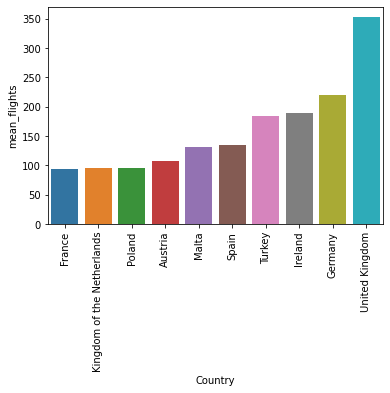


The cumulative percentage of these 10 countries
 represents the 63.18 % of total flights obtained.


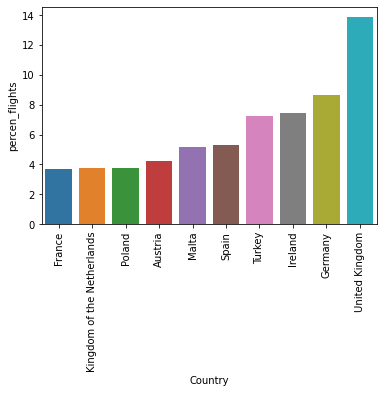

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dd = df_flights.sort_values(by='mean_flights', ascending=False).iloc[:10]
dd = dd.sort_values(by='mean_flights', ascending=True)
sns.barplot(x="Country", y="mean_flights", data=dd)
plt.xticks(rotation=90)
plt.show()

print('\nThe cumulative percentage of these 10 countries\n represents the ' +str(
    round(sum(dd['percen_flights']), 2))+ ' % of total flights obtained.')
sns.barplot(x="Country", y="percen_flights", data=dd)
plt.xticks(rotation=90)
plt.show()